# Monitor meeting spike day

This notebooks plots a day of 'typical' meeting spike observations of CO2 concetrations in the Small (A) meeting room.

Date: 06/04/2024

* _Input:_ Exported .csv from Aircheq logged files.
* _Output:_ Saves a plot in .png format to disk

**Tasks:** 
* Loads the .csv files
* Removes irrelevant sensor data
* Plots the C02 concentrations in a timeframe

## Metadata

* **Master**: Master Information Studies: Information Systems (track)
* **University**: University of Amsterdam (UvA)
* **Institute**: Informatics Institute
* **Faculty**: Faculty of Science (FNWI)
* **Research Group**: Digital Interactions Lab (DIL)
* **Student**: BSc Danny de Vries (14495643)
* **Supervisor**: Dr. H. (Hamed) Seiied Alavi PhD

[Viszlab](https://www.viszlab.github.io) © 2024 by [Danny de Vries](https://wwww.github.com/dandevri) is licensed under [CC BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1).

## Prequisites

This notebooks needs a sufficient Python version (>=3.6) to run and requires some packages and libraries for analysis and visualization. The following code checks if your installed Python version is compatible, installs the necessary packages and imports the packages into the notebook.

### Check Python installation

In [58]:
from packaging import version
import platform
import sys

min_version = '3.8'

def check_version(min_version):
    current_version = sys.version.split()[0]
    return version.parse(current_version) >= version.parse(min_version)

# Example usage:
if __name__ == "__main__":
    if check_version(min_version):
        print("Running a sufficiently new version of Python.")
        print("Current version: " + platform.python_version())
        print("Minimum required version: " + min_version)
    else:
        print("Python version is too old. Upgrade to a newer version.")

Running a sufficiently new version of Python.
Current version: 3.9.12
Minimum required version: 3.8


### Install the required packages

In [59]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

### Import the packages into the project

In [60]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

## Clean-up

### Load the full CSV

In [61]:
def import_csv(file):
    df = pd.read_csv(file)
    return df

file = 'monitor-data/room-a_monitor_week_data.csv'

full_data = import_csv(file)

print(full_data);

         Date and time  CO2   Temp    RH  PM1.0  PM2.5  PM10  TVOC     BP  O3
0     2024/05/05 23:55  411   20'C   41%      1      1     1    54  99.97   0
1     2024/05/05 23:50  411   20'C   41%      1      1     1    55  99.97   0
2     2024/05/05 23:45  411   20'C   41%      1      1     1    55  99.97   0
3     2024/05/05 23:40  410   20'C   41%      0      1     1    56  99.97   0
4     2024/05/05 23:35  410   20'C   41%      1      1     1    55  99.97   0
...                ...  ...    ...   ...    ...    ...   ...   ...    ...  ..
2578  2024/04/26 00:20  427   20'C   29%      0      0     0    95  99.97   0
2579  2024/04/26 00:15  424   20'C   29%      0      1     1    93  99.97   0
2580  2024/04/26 00:10  426   20'C   29%      0      0     0    95  99.97   0
2581  2024/04/26 00:05  427   20'C   29%      0      0     1    97  99.97   0
2582  2024/04/26 00:00  426   20'C   29%      0      0     0    99  99.97   0

[2583 rows x 10 columns]


### Remove irrelevant rows

Remove rows the other sensory data irrelevant for this analysis.

In [62]:
def filter_columns(data):
    data.columns = data.columns.str.strip()
    filtered_df = data[['Date and time', 'CO2']]
    return filtered_df

filtered_data = filter_columns(full_data)
print(filtered_data)

         Date and time  CO2
0     2024/05/05 23:55  411
1     2024/05/05 23:50  411
2     2024/05/05 23:45  411
3     2024/05/05 23:40  410
4     2024/05/05 23:35  410
...                ...  ...
2578  2024/04/26 00:20  427
2579  2024/04/26 00:15  424
2580  2024/04/26 00:10  426
2581  2024/04/26 00:05  427
2582  2024/04/26 00:00  426

[2583 rows x 2 columns]


### Filter one relevant date and opening hours

In [63]:
df = filtered_data;

# Convert 'Date and time' column to datetime type
df['Date and time'] = pd.to_datetime(df['Date and time'], format='%Y/%m/%d %H:%M')

# Filter the dataframe to keep only the records with the date '26/04/2024'
filtered_df = df[df['Date and time'].dt.strftime('%d/%m/%Y') == '26/04/2024']

# Further filter to keep only records between 8 am and 10 pm
filtered_df = filtered_df[(filtered_df['Date and time'].dt.hour >= 7) & (filtered_df['Date and time'].dt.hour < 23)]

print(filtered_df)

           Date and time  CO2
2307 2024-04-26 22:55:00  409
2308 2024-04-26 22:50:00  411
2309 2024-04-26 22:45:00  411
2310 2024-04-26 22:40:00  411
2311 2024-04-26 22:35:00  410
...                  ...  ...
2494 2024-04-26 07:20:00  434
2495 2024-04-26 07:15:00  433
2496 2024-04-26 07:10:00  431
2497 2024-04-26 07:05:00  429
2498 2024-04-26 07:00:00  430

[192 rows x 2 columns]


/var/folders/g8/85cbmx4x789d0579p3qt0xsm0000gn/T/ipykernel_34973/1595982853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date and time'] = pd.to_datetime(df['Date and time'], format='%Y/%m/%d %H:%M')


### Split into seperate columns

In [64]:
df = filtered_df;

# Convert 'Date and time' column to string type
df['Date and time'] = df['Date and time'].astype(str)

# Split 'Date and time' column into separate 'Date' and 'Time' columns
df[['Date', 'Time']] = df['Date and time'].str.split(' ', 1, expand=True)

# Drop the original 'Date and time' column if not needed anymore
df.drop(columns=['Date and time'], inplace=True)

print(df)

      CO2        Date      Time
2307  409  2024-04-26  22:55:00
2308  411  2024-04-26  22:50:00
2309  411  2024-04-26  22:45:00
2310  411  2024-04-26  22:40:00
2311  410  2024-04-26  22:35:00
...   ...         ...       ...
2494  434  2024-04-26  07:20:00
2495  433  2024-04-26  07:15:00
2496  431  2024-04-26  07:10:00
2497  429  2024-04-26  07:05:00
2498  430  2024-04-26  07:00:00

[192 rows x 3 columns]


/var/folders/g8/85cbmx4x789d0579p3qt0xsm0000gn/T/ipykernel_34973/3586874538.py:7: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Date', 'Time']] = df['Date and time'].str.split(' ', 1, expand=True)


### Plot the CO2 distribution

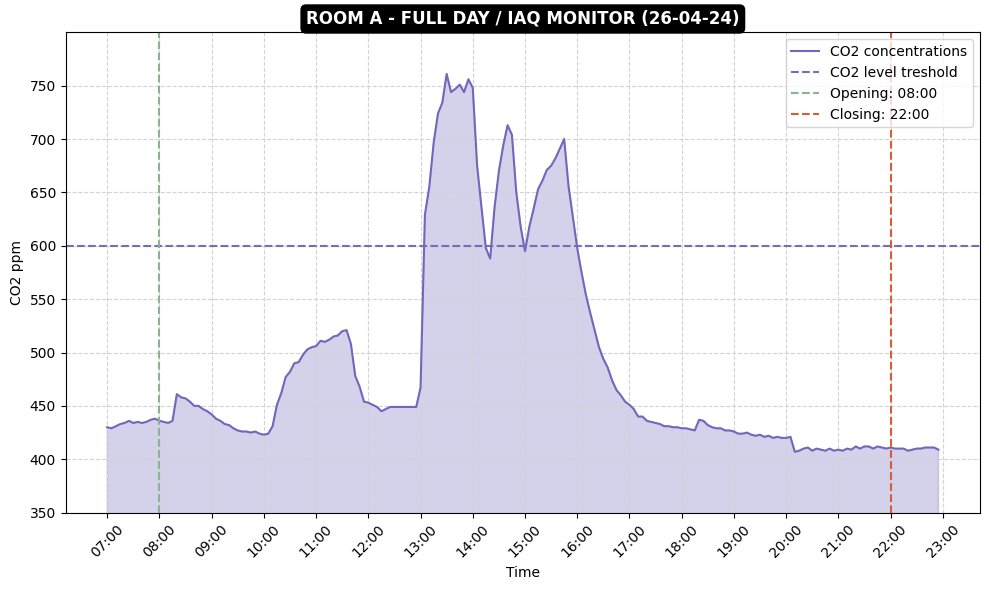

In [78]:
filtered_data = df;

# Convert 'Date' and 'Time' columns to datetime type
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Plot the DataFrame
plt.figure(figsize=(10, 6))

# Plot the original data with curved line
plt.plot(df['Datetime'], df['CO2'], linestyle='-', color='#7168bc', label='CO2 concentrations')

# Interpolate the data to create 1-minute intervals
new_index = pd.date_range(start=df['Datetime'].iloc[0], end=df['Datetime'].iloc[-1], freq='1T')
interpolated_data = df.set_index('Datetime').reindex(new_index).interpolate(method='linear')

# Plot the interpolated data with line
plt.plot(interpolated_data.index, interpolated_data['CO2'], linestyle='-', color='#7168bc')

title = plt.title('Room A - Full day / IAQ Monitor (26-04-24)'.upper(), fontweight="bold" )
title.set_position([.5, 0.6])  # Adjust the title position
title.set_color('white')  # Set title text color to white
title.set_bbox(dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.3'))  # Set title background color to black

plt.xlabel('Time')
plt.ylabel('CO2 ppm')
plt.xticks(rotation=45)

# Format x-axis ticks to show only time in the format "08:00"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))

# Fill the area under the line plot
plt.fill_between(df['Datetime'], df['CO2'], color='#7168bc', alpha=0.3)

# Draw horizontal line at 600 CO2 level mark
plt.axhline(y=600, color='#756db8', linestyle='--', label='CO2 level treshold')

# Add vertical lines at 08:00 and 22:00
plt.axvline(x=df[df['Time'] == '08:00:00']['Datetime'].iloc[0], color='#84b690', linestyle='--', label='Opening: 08:00')
plt.axvline(x=df[df['Time'] == '22:00:00']['Datetime'].iloc[0], color='#d85c36', linestyle='--', label='Closing: 22:00')

# Set y-axis limits and ticks
plt.ylim(350, 800)
plt.yticks(np.arange(350, 800, 50))

plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.legend(loc='upper right')  # Move legend to the top right

# Save the chart to disk
plt.savefig('monitor-charts/room-a-monitor-meeting-spike-day.png', dpi=300, bbox_inches='tight')

plt.show()